In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
import functools

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [3]:
train = pd.read_csv("/Users/wxu/workspace/regression/week4/kc_house_train_data.csv",sep=",",header=0,dtype = dtype_dict)
test = pd.read_csv("/Users/wxu/workspace/regression/week4/kc_house_test_data.csv",sep=",",header=0,dtype = dtype_dict)
house = pd.read_csv("/Users/wxu/workspace/regression/week4/kc_house_data.csv",sep=",",header= 0,dtype = dtype_dict)

In [5]:
def get_numpy_data(dataframe, features, output):
    
    dataframe['constant']=1
    features = ['constant'] + features
    features_matrix = dataframe[features].as_matrix()
    output_array = dataframe.as_matrix([output])
    
    return (features_matrix, output_array)

In [7]:
def predict_outcome(feature_matrix,weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [30]:
def feature_derivative_ridge(error, feature,curr_weight,l2_penalty,isConstant):
    if isConstant:
        derivative = 2*sum(error*feature)
    else:
        derivative = 2*sum(error*feature)+2*l2_penalty*curr_weight
    return(derivative)

In [31]:
def regression_gradient_descent_ridge(feature_matrix, output, initial_weights, step_size,l2Penalty,max_iterations=100):
    converged = False
    curr_weights = np.array(initial_weights)
    times=0
    while not converged:
        
        predictions = predict_outcome(feature_matrix,curr_weights)
        error = predictions-output
        
        gradient_sum_squares = 0
        
        for i in range(len(curr_weights)):
            ith_feature = feature_matrix[:,i]
            ith_feature.shape = (len(ith_feature),1)
            if i==0:
                ith_derivative = feature_derivative_ridge(error,ith_feature,curr_weights[i],l2_penalty=l2Penalty,isConstant=True)
            else:
                ith_derivative = feature_derivative_ridge(error,ith_feature,curr_weights[i],l2_penalty=l2Penalty,isConstant=False)
            
            gradient_sum_squares = gradient_sum_squares+ith_derivative**2
            curr_weights[i] = curr_weights[i]-step_size*ith_derivative
        
        gradient_magnitude = math.sqrt(gradient_sum_squares)
        if times>=max_iterations :
            converged = True
        times += 1
    return(curr_weights)

In [15]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)

In [38]:
simple_weights_0_penalty = regression_gradient_descent_ridge(feature_matrix=simple_feature_matrix, output=output,
                                                             initial_weights=[[0.0],[0.0]], 
                                                             step_size=1e-12, l2Penalty=0.0,max_iterations=1000)

In [39]:
simple_weights_0_penalty

array([[ -1.63382329e-01],
       [  2.63024369e+02]])

In [40]:
simple_weights_high_penalty = regression_gradient_descent_ridge(feature_matrix=simple_feature_matrix, output=output,
                                                             initial_weights=[[0.0],[0.0]], 
                                                             step_size=1e-12, l2Penalty=1e11,max_iterations=1000)

In [41]:
simple_weights_high_penalty

array([[   9.77704731],
       [ 124.57217382]])

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

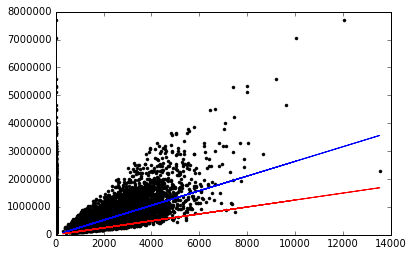

In [46]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [61]:
# initial weight 0
print sum((test_output-predict_outcome(simple_test_feature_matrix,weights=[[0.0],[0.0]]))**2)
# weight small l2 penalty
print sum((test_output-predict_outcome(simple_test_feature_matrix,weights=simple_weights_0_penalty))**2)
# weight large l2 penalty
print sum((test_output-predict_outcome(simple_test_feature_matrix,weights=simple_weights_high_penalty))**2)

[  1.78427329e+15]
[  2.75723632e+14]
[  6.94642089e+14]


In [52]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test, model_features, my_output)

In [54]:
multiple_weights_0_penalty = regression_gradient_descent_ridge(feature_matrix=feature_matrix, output=output,
                                                             initial_weights=[[0.0],[0.0],[0.0]], 
                                                             step_size=1e-12, l2Penalty=0.0,max_iterations=1000)

In [55]:
multiple_weights_0_penalty

array([[  -0.35780714],
       [ 243.05572642],
       [  22.41312485]])

In [56]:
multiple_weights_high_penalty = regression_gradient_descent_ridge(feature_matrix=feature_matrix, output=output,
                                                             initial_weights=[[0.0],[0.0],[0.0]], 
                                                             step_size=1e-12, l2Penalty=1e11,max_iterations=1000)

In [58]:
multiple_weights_high_penalty

array([[  6.74968592],
       [ 91.48927275],
       [ 78.43658676]])

In [62]:
# initial weight 0
print sum((test_output-predict_outcome(test_feature_matrix,weights=[[0.0],[0.0],[0.0]]))**2)
# weight small l2 penalty
print sum((test_output-predict_outcome(test_feature_matrix,weights=multiple_weights_0_penalty))**2)
# weight large l2 penalty
print sum((test_output-predict_outcome(test_feature_matrix,weights=multiple_weights_high_penalty))**2)

[  1.78427329e+15]
[  2.74067692e+14]
[  5.00404797e+14]


In [60]:
error1 = test_output-predict_outcome(test_feature_matrix,weights=multiple_weights_0_penalty)
error2 = test_output-predict_outcome(test_feature_matrix,weights=multiple_weights_high_penalty)
print error1[0],error2[0]

[-77464.6932133] [ 39546.46585319]
